# Alcohol and Gaming Commission of Ontario

Senior Data Scientist Technical Assessment

Derya Kici, June 1, 2023

Develop a predictive model using the given dataset on Chicago restaurant inspections. The aim is to identify establishments at a higher risk of violations

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
import imblearn

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


# Load Data

In [4]:
# data = pd.read_csv("C:\\Users\\derya\\Desktop\\AGCO Pre-Interview Assessment\\data\\Food Inspections and Violations.csv")
data = pd.read_csv("/content/gdrive/MyDrive/AGCO Pre-Interview Assessment/data/Food Inspections and Violations.csv")
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [5]:
data.shape

(135742, 17)

<Axes: >

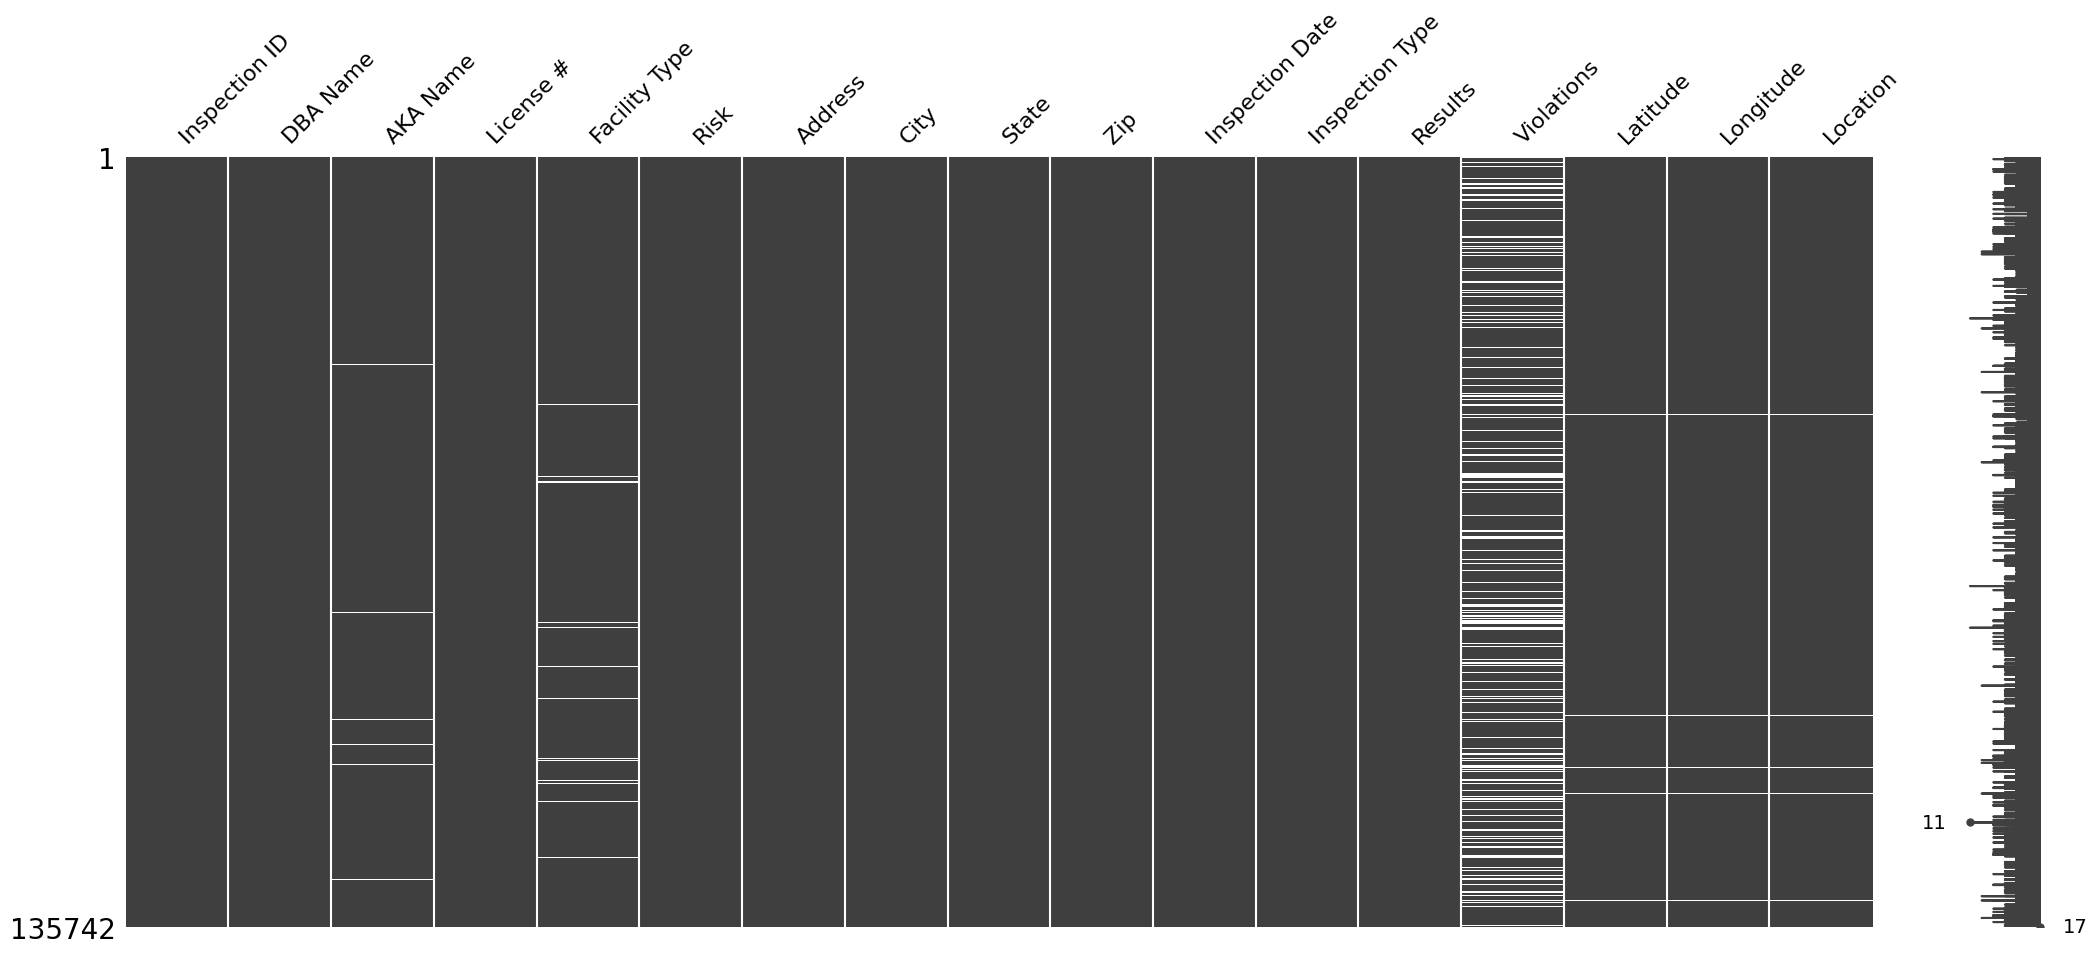

In [6]:
# Check the missing values
msno.matrix(data)

In [7]:
data.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2173
License #             13
Facility Type       3716
Risk                  45
Address                0
City                 137
State                  8
Zip                   82
Inspection Date        0
Inspection Type        1
Results                0
Violations         27085
Latitude             482
Longitude            482
Location             482
dtype: int64

In [8]:
data["Results"].unique()

array(['Pass', 'Not Ready', 'Fail', 'Out of Business', 'No Entry',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

In [9]:
data = data.dropna()

In [10]:
data = data.dropna(subset = ['Violations'])

<Axes: >

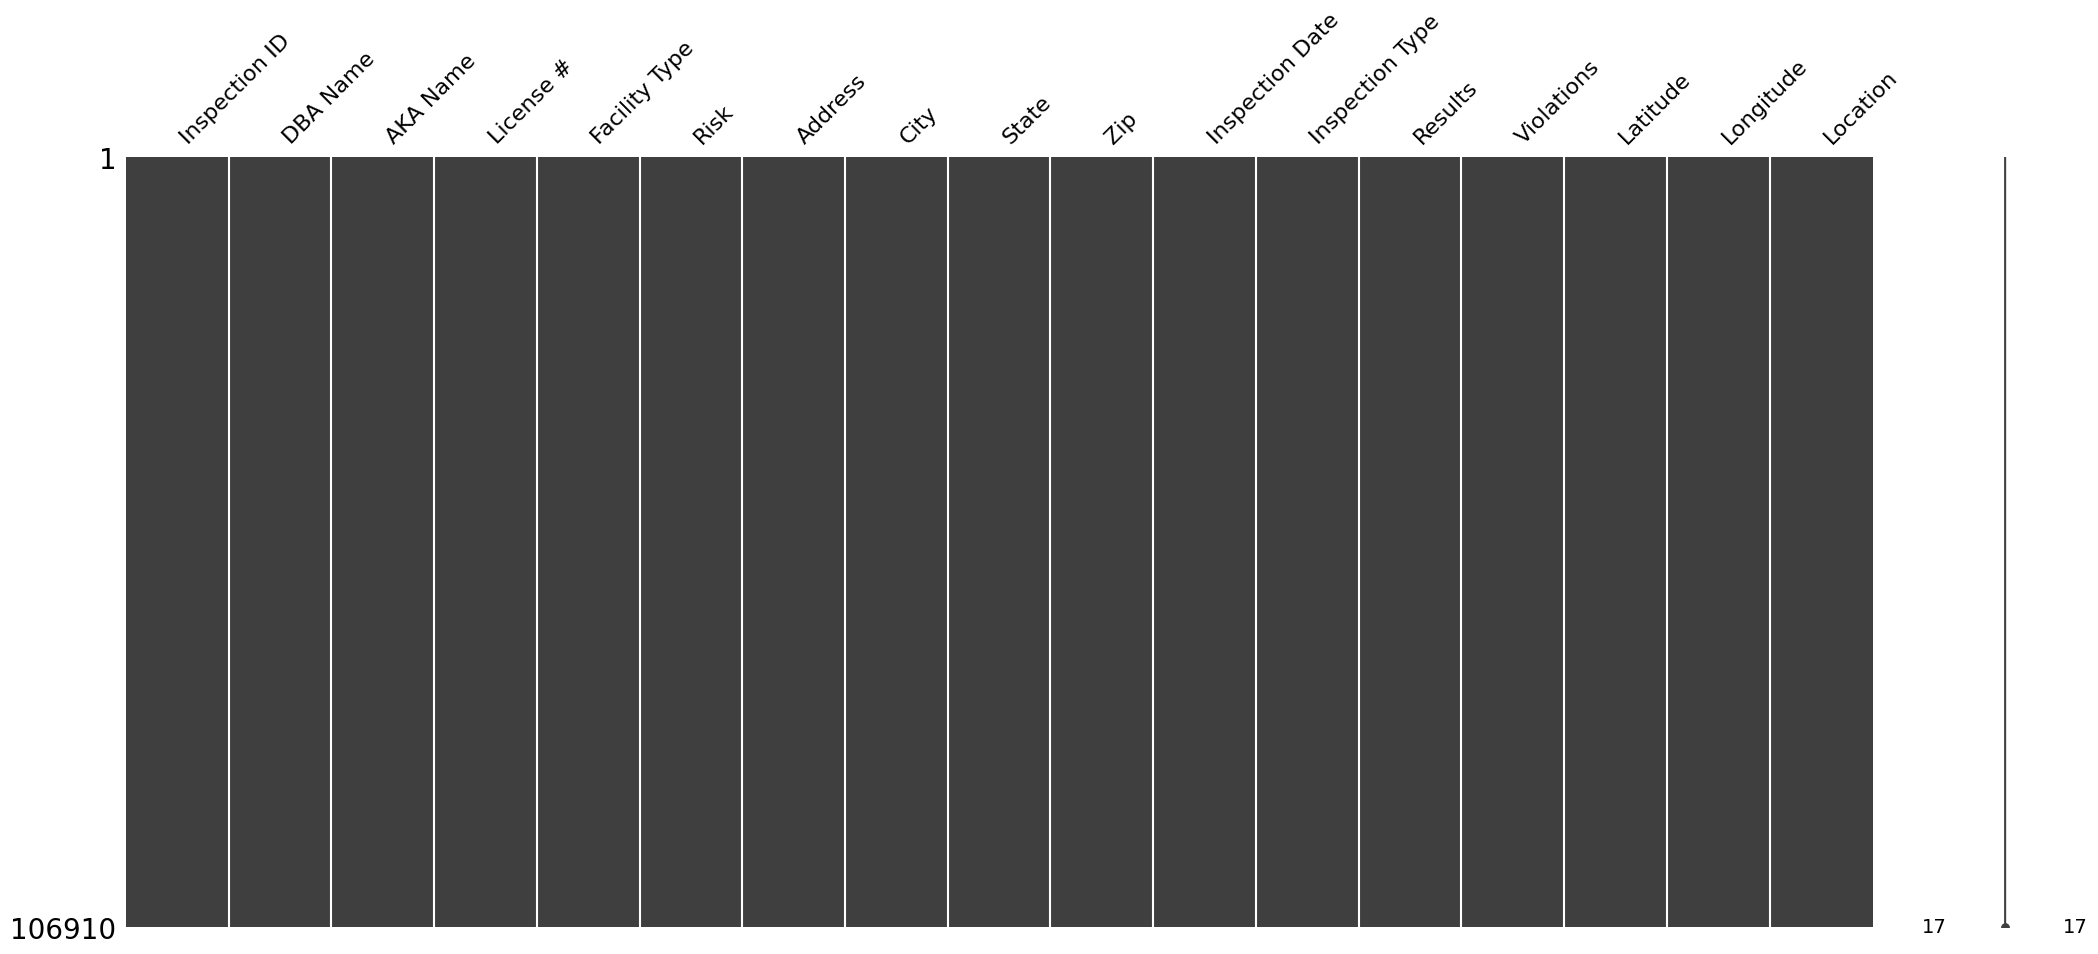

In [11]:
msno.matrix(data)

In [12]:
data.isnull().sum()

Inspection ID      0
DBA Name           0
AKA Name           0
License #          0
Facility Type      0
Risk               0
Address            0
City               0
State              0
Zip                0
Inspection Date    0
Inspection Type    0
Results            0
Violations         0
Latitude           0
Longitude          0
Location           0
dtype: int64

The highest number of missing values is in Violations feature. 
The second highest is Facility Type.
This is an important feature in my classification model. 22% of the data is missing When we remove the missing values, we still have over 100K data


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106910 entries, 2 to 135741
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    106910 non-null  int64  
 1   DBA Name         106910 non-null  object 
 2   AKA Name         106910 non-null  object 
 3   License #        106910 non-null  float64
 4   Facility Type    106910 non-null  object 
 5   Risk             106910 non-null  object 
 6   Address          106910 non-null  object 
 7   City             106910 non-null  object 
 8   State            106910 non-null  object 
 9   Zip              106910 non-null  float64
 10  Inspection Date  106910 non-null  object 
 11  Inspection Type  106910 non-null  object 
 12  Results          106910 non-null  object 
 13  Violations       106910 non-null  object 
 14  Latitude         106910 non-null  float64
 15  Longitude        106910 non-null  float64
 16  Location         106910 non-null  obje

In [14]:
data.nunique()

Inspection ID      106910
DBA Name            17590
AKA Name            17154
License #           21954
Facility Type         331
Risk                    3
Address             14227
City                   12
State                   1
Zip                    60
Inspection Date      1664
Inspection Type        33
Results                 6
Violations         106041
Latitude            13784
Longitude           13784
Location            13789
dtype: int64

In [15]:
data[data.duplicated()]
#There is no duplicated data. Then, the size of our data is 135,742

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location


# Understanding Data

Inspection ID, License #, Zip, Latitude, and Longitude  are a series of numbers however
they do not refer to a numerical values. I will not do any calculations with these features. 

<Axes: xlabel='Risk', ylabel='count'>

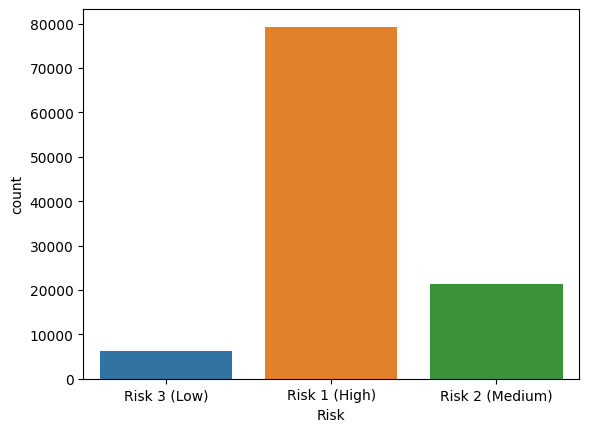

In [16]:
data["Risk"].unique()
sns.countplot(x=data["Risk"])

In [17]:
data['Risk'].value_counts()

Risk 1 (High)      79326
Risk 2 (Medium)    21407
Risk 3 (Low)        6177
Name: Risk, dtype: int64

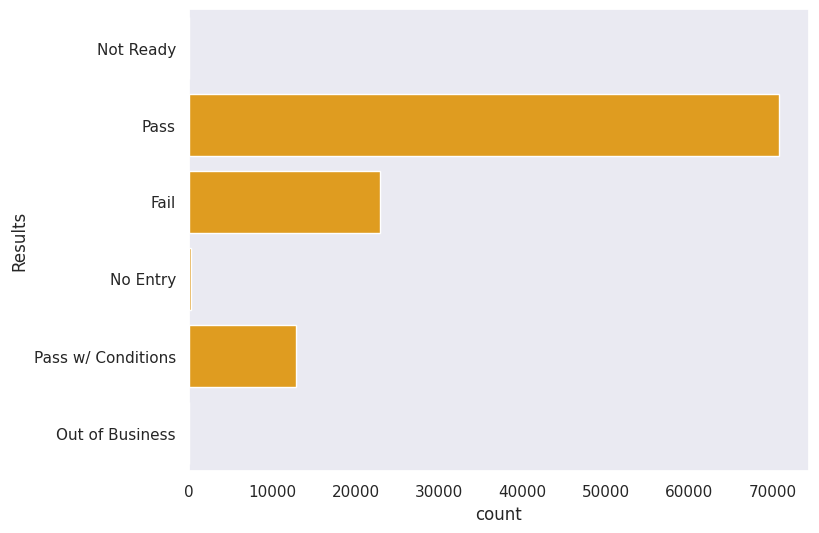

In [18]:
plt.figure(figsize = (8, 6))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot(y = 'Results', data = data, color = 'orange')
plt.show()

<Axes: xlabel='Results', ylabel='count'>

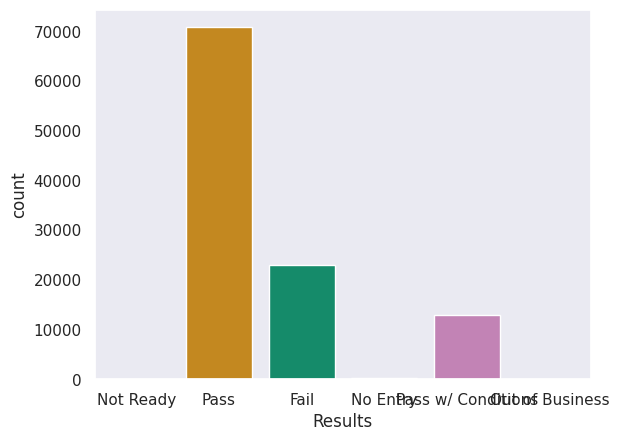

In [19]:
data["Results"].unique()
sns.countplot(x=data["Results"])

In [20]:
data['Results'].value_counts()

Pass                  70807
Fail                  22916
Pass w/ Conditions    12833
No Entry                298
Out of Business          31
Not Ready                25
Name: Results, dtype: int64

In [21]:
len(data[data["Risk"].isna()])

0

This is an imbalanced dataset. Then I will need to implement balancing starategy before classification.

Let's see what features we might need in our classification model:

Target feature: Risk

Alternative target feature: Results

Independent vairables: 

License #

Facility Type

City

Zip

Inspection Date

Inspection Type

Violations

In [22]:
columns = ["Inspection ID","License #", "Facility Type", "Risk", "City", "Zip", "Inspection Date", "Inspection Type", "Results"
, "Violations"]

for col in columns:
    print(col, ":", data[col].nunique())

Inspection ID : 106910
License # : 21954
Facility Type : 331
Risk : 3
City : 12
Zip : 60
Inspection Date : 1664
Inspection Type : 33
Results : 6
Violations : 106041


The Inspection Id and name of the restaurants do

```
# This is formatted as code
```

 not effect the Risk feature. 
State is the same for all restaurants.
I do not need open address, I already include Zipcode for address information.
Lattitude, Longitude, and Location might be useful for plotting maps. 

In [23]:
df = data[columns].copy()
df.head()

,Inspection ID,License #,Facility Type,Risk,City,Zip,Inspection Date,Inspection Type,Results,Violations
2,2079125,2446638.0,Special Event,Risk 3 (Low),CHICAGO,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...
3,2079123,2517338.0,Restaurant,Risk 1 (High),CHICAGO,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR..."
4,2079105,2549079.0,CHARTER SCHOOL,Risk 1 (High),CHICAGO,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...
5,2079104,2549497.0,Restaurant,Risk 2 (Medium),CHICAGO,60653.0,08/28/2017,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...
6,2079091,64682.0,Restaurant,Risk 1 (High),CHICAGO,60622.0,08/25/2017,Canvass,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...


# Data Preprocessing

There exists multiple violation codes for some restaurants, then I need to seperate the violan codes from this Violation column. The violations are listed in the same column by using '|".

In [30]:
df2 = df.join(df['Violations'].str.split('|',expand = True).add_prefix('Violations_')) 
df2 = df2.drop(columns = {"Violations"})
df2 = df2.melt(id_vars=["Inspection ID","Facility Type","Risk","Results", "Inspection Date","Inspection Type"], 
        var_name="viol", 
        value_name="Violation_id")
df2 = df2.drop(columns = {'viol'})
df2 = df2.dropna(subset = 'Violation_id')
df2['Violation_id'] = (df2['Violation_id'].str.rsplit('.')).str[0]
df2["Violation_id"] = df2["Violation_id"].str.strip()
df2.head(2)

,Inspection ID,Facility Type,Risk,Results,Inspection Date,Inspection Type,Violation_id
0,2079125,Special Event,Risk 3 (Low),Not Ready,08/28/2017,License Re-Inspection,NaN
1,2079123,Restaurant,Risk 1 (High),Pass,08/28/2017,License,NaN


In [31]:
df2.isnull().sum()

Inspection ID           0
Facility Type           0
Risk                    0
Results                 0
Inspection Date         0
Inspection Type         0
Violation_id       213820
dtype: int64

In [32]:
df2["Month"] = df2["Inspection Date"].astype(str).str[:2]
df2["Day"] = df2["Inspection Date"].astype(str).str[3:5]
df2["Year"] = df2["Inspection Date"].astype(str).str[-4:]
df2 = df2.drop(columns={"Inspection Date"})
df2

,Inspection ID,Facility Type,Risk,Results,Inspection Type,Violation_id,Month,Day,Year
0,2079125,Special Event,Risk 3 (Low),Not Ready,License Re-Inspection,NaN,08,28,2017
1,2079123,Restaurant,Risk 1 (High),Pass,License,NaN,08,28,2017
2,2079105,CHARTER SCHOOL,Risk 1 (High),Pass,License Re-Inspection,NaN,08,28,2017
3,2079104,Restaurant,Risk 2 (Medium),Fail,License,NaN,08,28,2017
4,2079091,Restaurant,Risk 1 (High),Fail,Canvass,NaN,08,25,2017
...,...,...,...,...,...,...,...,...,...
2510984,1493296,Restaurant,Risk 1 (High),Fail,Suspected Food Poisoning,38,08,05,2014
2511566,1490895,Restaurant,Risk 1 (High),Fail,Suspected Food Poisoning,4,07,24,2014
2517347,1115232,Bakery,Risk 1 (High),Pass w/ Conditions,Complaint,41,03,27,2014
2624257,1115232,Bakery,Risk 1 (High),Pass w/ Conditions,Complaint,42,03,27,2014


# EDA

The composition of all restaurants with respect to the Results category

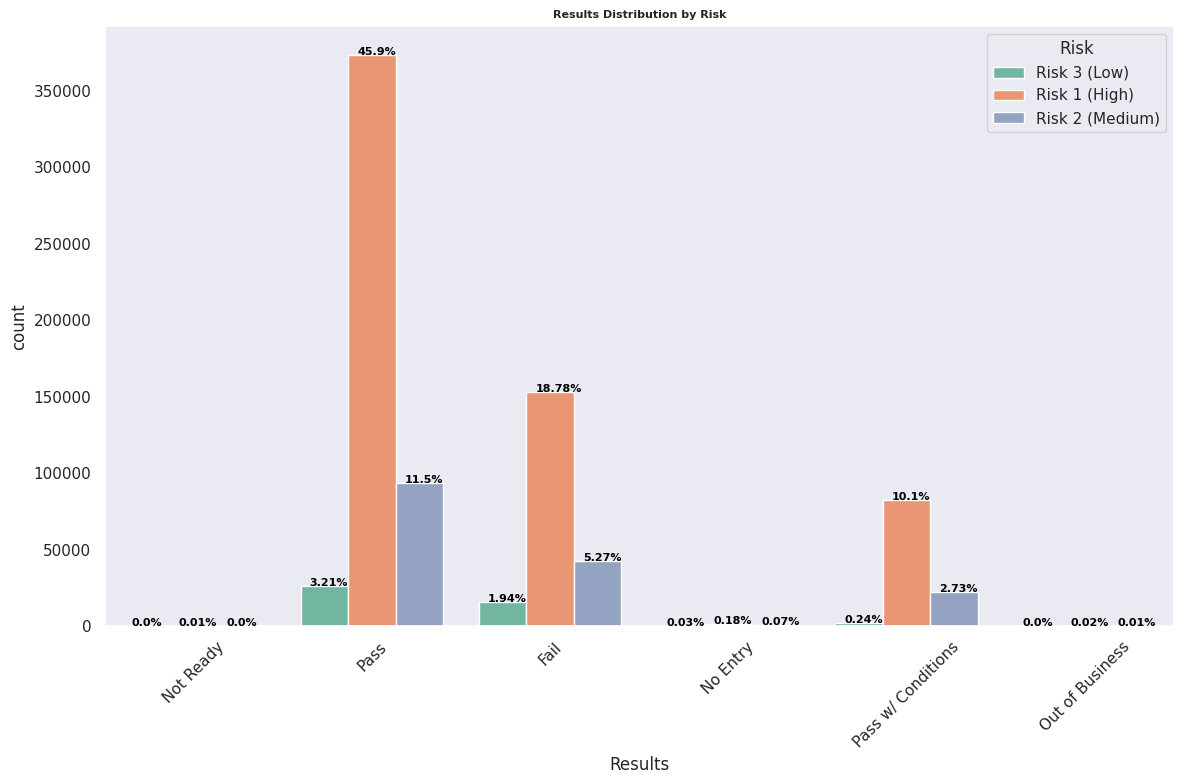

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
name = df2['Results'].unique()
ax = sns.countplot(x='Results', hue='Risk', data=df2, palette='Set2')
ax.set_title("Results Distribution by Risk", fontsize = 8, weight = 'bold')
ax.set_xticklabels (name, rotation = 45)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,
                color='black', weight = 'bold')  
plt.tight_layout()

In [34]:
df2.nunique()

Inspection ID      106910
Facility Type         331
Risk                    3
Results                 6
Inspection Type        33
Violation_id           58
Month                  12
Day                    31
Year                    7
dtype: int64

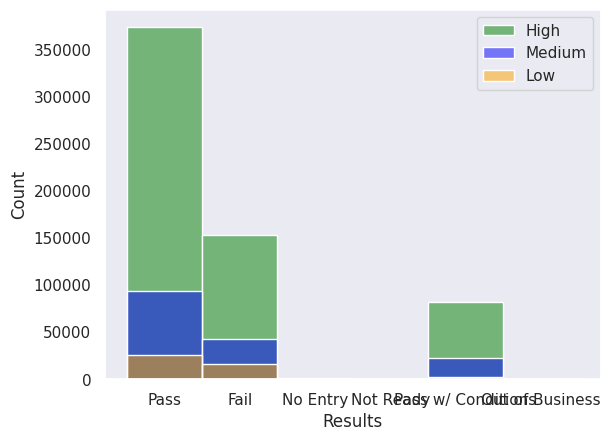

In [35]:
risk1 = df2[df2["Risk"]=='Risk 1 (High)']
risk2 = df2[df2["Risk"]=='Risk 2 (Medium)']
risk3 = df2[df2["Risk"]=='Risk 3 (Low)']
plt.subplot()
sns.histplot(risk1["Results"],color='green',alpha=0.5,label='High')
sns.histplot(risk2["Results"],color='blue',alpha=0.5,label='Medium')
sns.histplot(risk3["Results"],color='orange',alpha=0.5,label='Low')
plt.legend()

In [36]:
df2.head()

,Inspection ID,Facility Type,Risk,Results,Inspection Type,Violation_id,Month,Day,Year
0,2079125,Special Event,Risk 3 (Low),Not Ready,License Re-Inspection,NaN,08,28,2017
1,2079123,Restaurant,Risk 1 (High),Pass,License,NaN,08,28,2017
2,2079105,CHARTER SCHOOL,Risk 1 (High),Pass,License Re-Inspection,NaN,08,28,2017
3,2079104,Restaurant,Risk 2 (Medium),Fail,License,NaN,08,28,2017
4,2079091,Restaurant,Risk 1 (High),Fail,Canvass,NaN,08,25,2017


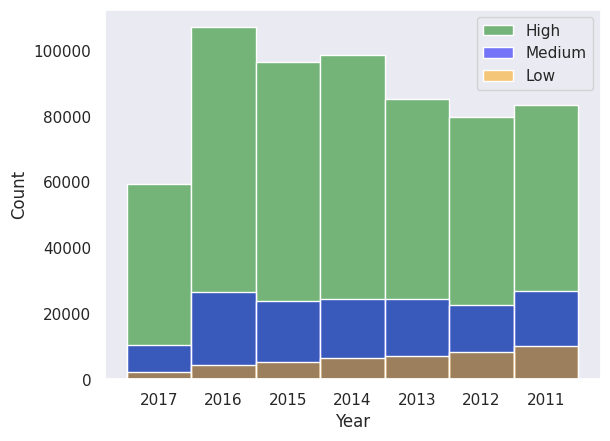

In [37]:
risk1 = df2[df2["Risk"]=='Risk 1 (High)']
risk2 = df2[df2["Risk"]=='Risk 2 (Medium)']
risk3 = df2[df2["Risk"]=='Risk 3 (Low)']
plt.subplot()
sns.histplot(risk1["Year"],color='green',alpha=0.5,label='High')
sns.histplot(risk2["Year"],color='blue',alpha=0.5,label='Medium')
sns.histplot(risk3["Year"],color='orange',alpha=0.5,label='Low')
plt.legend()

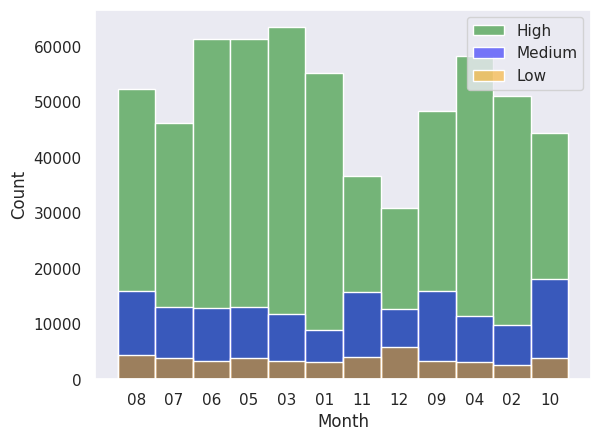

In [38]:
risk1 = df2[df2["Risk"]=='Risk 1 (High)']
risk2 = df2[df2["Risk"]=='Risk 2 (Medium)']
risk3 = df2[df2["Risk"]=='Risk 3 (Low)']
plt.subplot()
sns.histplot(risk1["Month"],color='green',alpha=0.5,label='High')
sns.histplot(risk2["Month"],color='blue',alpha=0.5,label='Medium')
sns.histplot(risk3["Month"],color='orange',alpha=0.5,label='Low')
plt.legend()

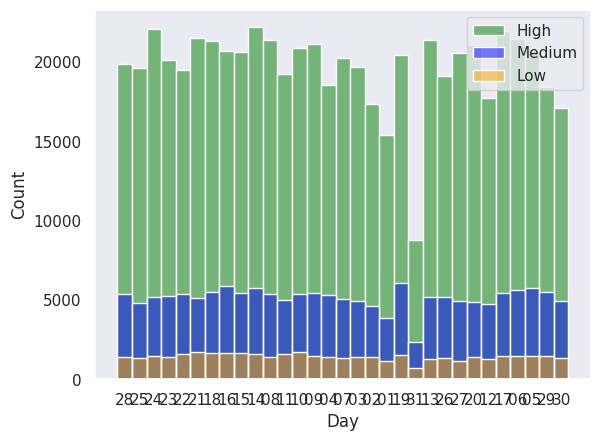

In [39]:
risk1 = df2[df2["Risk"]=='Risk 1 (High)']
risk2 = df2[df2["Risk"]=='Risk 2 (Medium)']
risk3 = df2[df2["Risk"]=='Risk 3 (Low)']
plt.subplot()
sns.histplot(risk1["Day"],color='green',alpha=0.5,label='High')
sns.histplot(risk2["Day"],color='blue',alpha=0.5,label='Medium')
sns.histplot(risk3["Day"],color='orange',alpha=0.5,label='Low')
plt.legend()

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=0.6)

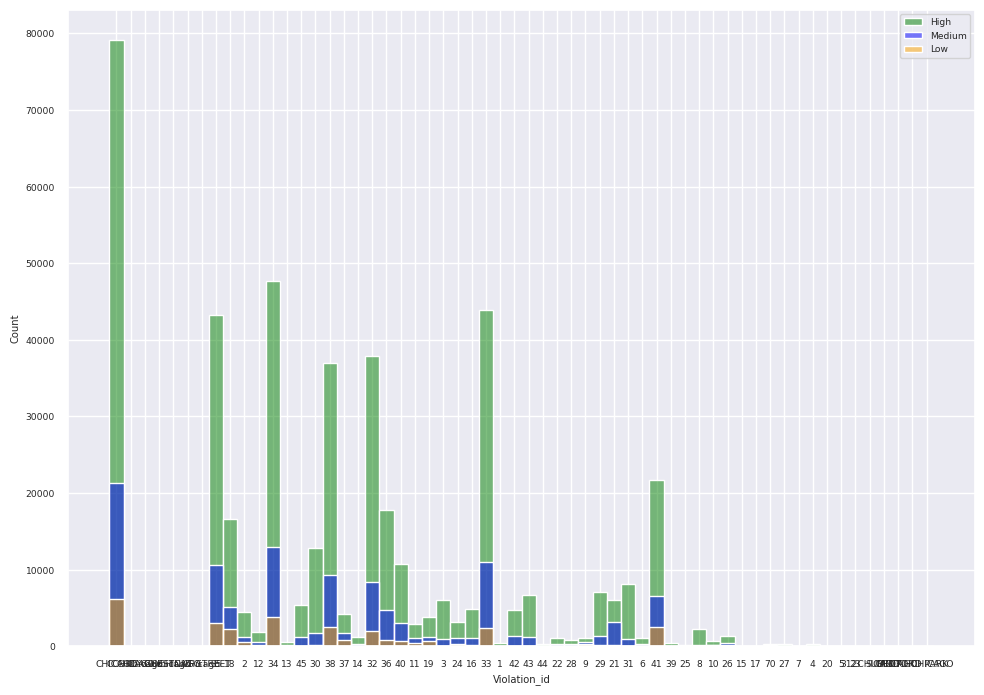

In [41]:
risk1 = df2[df2["Risk"]=='Risk 1 (High)']
risk2 = df2[df2["Risk"]=='Risk 2 (Medium)']
risk3 = df2[df2["Risk"]=='Risk 3 (Low)']
plt.subplot()
sns.histplot(risk1["Violation_id"],color='green',alpha=0.5,label='High')
sns.histplot(risk2["Violation_id"],color='blue',alpha=0.5,label='Medium')
sns.histplot(risk3["Violation_id"],color='orange',alpha=0.5,label='Low')
plt.legend()

# Balance The Data

In [42]:
df3 = df2[["Inspection ID","Risk","Violation_id"]]
df3["Violation_id"] = "Violation_" + df3["Violation_id"] 
df3

<ipython-input-42-10ef8f888fdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Violation_id"] = "Violation_" + df3["Violation_id"]


,Inspection ID,Risk,Violation_id
0,2079125,Risk 3 (Low),NaN
1,2079123,Risk 1 (High),NaN
2,2079105,Risk 1 (High),NaN
3,2079104,Risk 2 (Medium),NaN
4,2079091,Risk 1 (High),NaN
...,...,...,...
2510984,1493296,Risk 1 (High),Violation_38
2511566,1490895,Risk 1 (High),Violation_4
2517347,1115232,Risk 1 (High),Violation_41
2624257,1115232,Risk 1 (High),Violation_42


[Text(0, 0, 'Violation_CHICAGO'),
 Text(1, 0, 'Violation_CCHICAGO'),
 Text(2, 0, 'Violation_Chicago'),
 Text(3, 0, 'Violation_CHICAGOCHICAGO'),
 Text(4, 0, 'Violation_312CHICAGO'),
 Text(5, 0, 'Violation_chicago'),
 Text(6, 0, 'Violation_CHESTNUT STREET'),
 Text(7, 0, 'Violation_CHicago'),
 Text(8, 0, 'Violation_BEDFORD PARK'),
 Text(9, 0, 'Violation_CHCHICAGO'),
 Text(10, 0, 'Violation_SUMMIT'),
 Text(11, 0, 'Violation_CHICAGOI'),
 Text(12, 0, 'Violation_8'),
 Text(13, 0, 'Violation_35'),
 Text(14, 0, 'Violation_18'),
 Text(15, 0, 'Violation_2'),
 Text(16, 0, 'Violation_12'),
 Text(17, 0, 'Violation_34'),
 Text(18, 0, 'Violation_13'),
 Text(19, 0, 'Violation_45'),
 Text(20, 0, 'Violation_30'),
 Text(21, 0, 'Violation_38'),
 Text(22, 0, 'Violation_16'),
 Text(23, 0, 'Violation_37'),
 Text(24, 0, 'Violation_14'),
 Text(25, 0, 'Violation_32'),
 Text(26, 0, 'Violation_36'),
 Text(27, 0, 'Violation_40'),
 Text(28, 0, 'Violation_11'),
 Text(29, 0, 'Violation_19'),
 Text(30, 0, 'Violation_9'

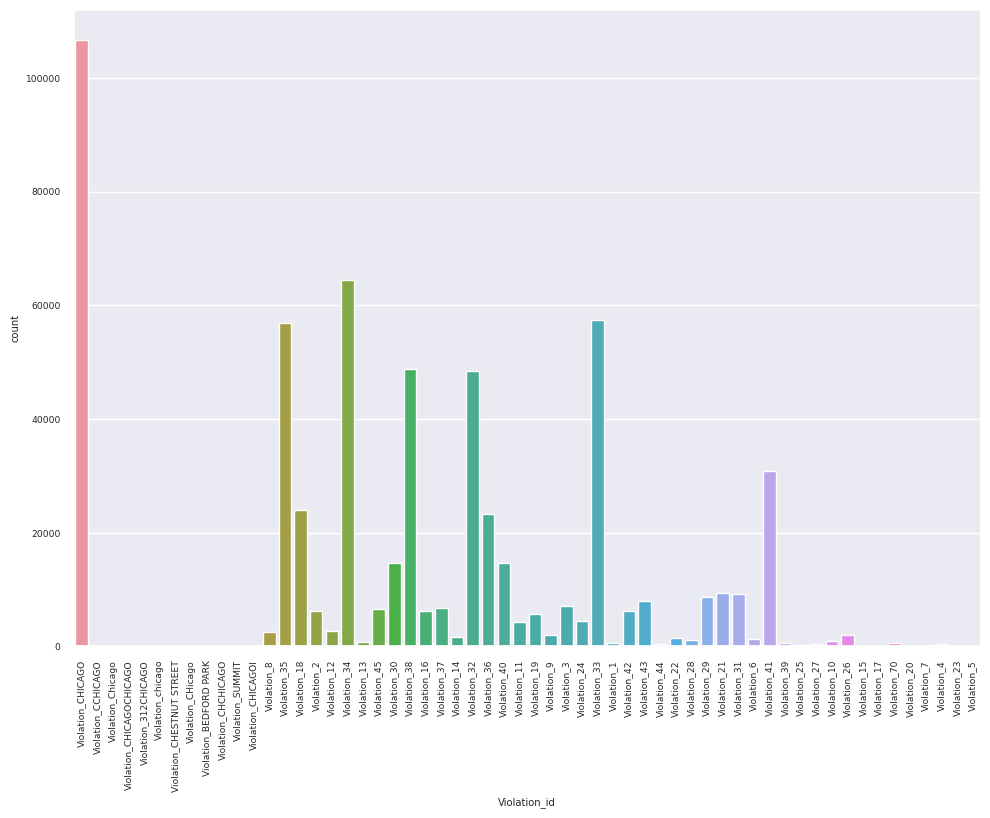

In [43]:
violation_plot = sns.countplot(data=df3, x='Violation_id')
violation_plot.set_xticklabels(violation_plot.get_xticklabels(), rotation=90)

In [44]:
df3["Violation_id"].value_counts()

Violation_CHICAGO            106647
Violation_34                  64503
Violation_33                  57338
Violation_35                  56872
Violation_38                  48871
Violation_32                  48370
Violation_41                  30779
Violation_18                  24075
Violation_36                  23305
Violation_30                  14715
Violation_40                  14606
Violation_21                   9325
Violation_31                   9167
Violation_29                   8624
Violation_43                   8016
Violation_3                    7029
Violation_37                   6755
Violation_45                   6647
Violation_2                    6283
Violation_16                   6191
Violation_42                   6186
Violation_19                   5772
Violation_24                   4507
Violation_11                   4364
Violation_12                   2767
Violation_8                    2516
Violation_26                   2012
Violation_9                 

In [45]:
df3["Violation_id"].nunique()

58

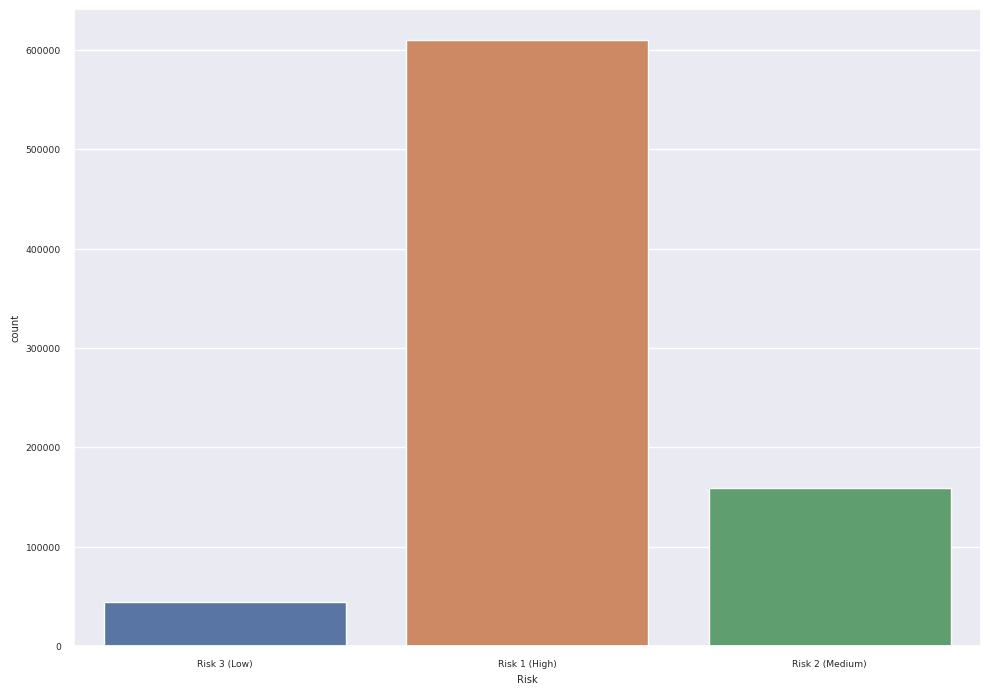

In [46]:
sns.countplot(data=df3, x='Risk')
plt.show()

In [47]:
# --The End --